# Find tract number of each each incident

In [1]:
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd
import numpy as np
import geopandas as gpd
from __future__ import print_function
import pylab as pl
import os
import json
import sys
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame
import requests
import geopandas

Populating the interactive namespace from numpy and matplotlib


In [2]:
import shapely
from shapely import geometry
import collections
import geopandas as gp
from fiona.crs import from_epsg

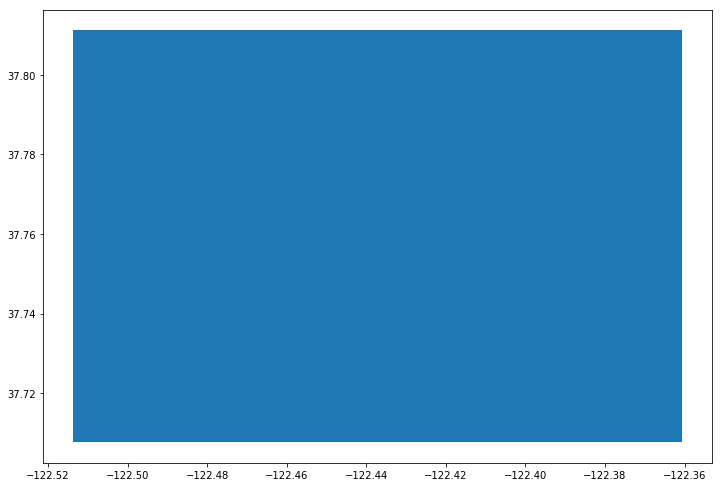

In [6]:
figsize(12,12)
ct_path = 'g.shp' #census tract
sf_ct = GeoDataFrame.from_file(ct_path)
sf_ct.plot()

In [7]:
sf_ct.head()

,FID,geometry
0,0,"POLYGON ((-122.51364836 37.811165, -122.509148..."
1,1,"POLYGON ((-122.51364836 37.806665, -122.509148..."
2,2,"POLYGON ((-122.51364836 37.802165, -122.509148..."
3,3,"POLYGON ((-122.51364836 37.797665, -122.509148..."
4,4,"POLYGON ((-122.51364836 37.793165, -122.509148..."


In [8]:
GEOPANDAS = True #False # use geopandas to get zips of rides
ALTERNATIVES = False # use pre-prepared files

In [9]:
sf_ct.crs = from_epsg(2263) 

In [10]:
gas = pd.read_csv('Fire_Department_Calls_for_Service_Gas.csv')

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,22,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
gas['lat'] = pd.DataFrame(gas.Location.apply(lambda x: x.replace('(','').replace(')','').split(', ')[0]))

In [12]:
gas['long'] = pd.DataFrame(gas.Location.apply(lambda x: x.replace('(','').replace(')','').split(', ')[1]))

In [13]:
gas['lat'] = gas['lat'].astype(float)
gas['long'] = gas['long'].astype(float)

In [14]:
gas.head()

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID,lat,long
0,1050242,E12,31236,Gas Leak (Natural and LP Gases),4/14/00,4/14/00,4/14/00 16:58,4/14/00 16:59,4/14/00 17:01,NaN,...,1,ENGINE,1,5,7,Inner Sunset,"(37.7633165969878, -122.458205988587)",001050242-E12,37.763317,-122.458206
1,1050319,E44,31311,Gas Leak (Natural and LP Gases),4/14/00,4/14/00,4/14/00 20:34,4/14/00 20:34,4/14/00 20:35,4/14/00 20:36,...,1,ENGINE,1,9,10,Visitacion Valley,"(37.7096032041108, -122.409888540797)",001050319-E44,37.709603,-122.409889
2,1070275,E17,31946,Gas Leak (Natural and LP Gases),4/16/00,4/16/00,4/16/00 20:38,4/16/00 20:39,4/16/00 20:39,4/16/00 20:41,...,1,ENGINE,1,10,10,Bayview Hunters Point,"(37.7291935618432, -122.374002352858)",001070275-E17,37.729194,-122.374002
3,1080336,E17,32305,Gas Leak (Natural and LP Gases),4/17/00,4/17/00,4/17/00 22:08,4/17/00 22:09,4/17/00 22:09,4/17/00 22:12,...,1,ENGINE,1,10,10,Bayview Hunters Point,"(37.7262373966555, -122.393902508468)",001080336-E17,37.726237,-122.393903
4,1090191,E40,32517,Gas Leak (Natural and LP Gases),4/18/00,4/18/00,4/18/00 16:44,4/18/00 16:45,4/18/00 16:46,4/18/00 16:47,...,1,ENGINE,1,8,4,Sunset/Parkside,"(37.7617311116621, -122.47754025709)",001090191-E40,37.761731,-122.477540


In [15]:
gas['lonlat'] = list(zip(gas.long.values, gas.lat.values))

In [16]:
gas['geometry'] = gas['lonlat'].map(lambda x: shapely.geometry.Point(list(x)))

In [17]:
gas.crs = from_epsg(2263)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [18]:
gas_tract = gp.sjoin(gas, sf_ct, how="inner", op='intersects')[['lat','long','lonlat', 'FID']]

In [19]:
gas_tract.head()

,lat,long,lonlat,FID
0,37.763317,-122.458206,"(-122.458205988587, 37.7633165969878)",286
64,37.763317,-122.458206,"(-122.458205988587, 37.7633165969878)",286
65,37.763317,-122.458206,"(-122.458205988587, 37.7633165969878)",286
66,37.763317,-122.458206,"(-122.458205988587, 37.7633165969878)",286
141,37.763317,-122.458206,"(-122.458205988587, 37.7633165969878)",286


In [20]:
gas.head()

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID,lat,long,lonlat,geometry
index_left,,,,,,,,,,,,,,,,,,,,,
0,1050242,E12,31236,Gas Leak (Natural and LP Gases),4/14/00,4/14/00,4/14/00 16:58,4/14/00 16:59,4/14/00 17:01,NaN,...,1,5,7,Inner Sunset,"(37.7633165969878, -122.458205988587)",001050242-E12,37.763317,-122.458206,"(-122.458205988587, 37.7633165969878)",POINT (-122.458205988587 37.7633165969878)
1,1050319,E44,31311,Gas Leak (Natural and LP Gases),4/14/00,4/14/00,4/14/00 20:34,4/14/00 20:34,4/14/00 20:35,4/14/00 20:36,...,1,9,10,Visitacion Valley,"(37.7096032041108, -122.409888540797)",001050319-E44,37.709603,-122.409889,"(-122.409888540797, 37.7096032041108)",POINT (-122.409888540797 37.7096032041108)
2,1070275,E17,31946,Gas Leak (Natural and LP Gases),4/16/00,4/16/00,4/16/00 20:38,4/16/00 20:39,4/16/00 20:39,4/16/00 20:41,...,1,10,10,Bayview Hunters Point,"(37.7291935618432, -122.374002352858)",001070275-E17,37.729194,-122.374002,"(-122.374002352858, 37.7291935618432)",POINT (-122.374002352858 37.7291935618432)
3,1080336,E17,32305,Gas Leak (Natural and LP Gases),4/17/00,4/17/00,4/17/00 22:08,4/17/00 22:09,4/17/00 22:09,4/17/00 22:12,...,1,10,10,Bayview Hunters Point,"(37.7262373966555, -122.393902508468)",001080336-E17,37.726237,-122.393903,"(-122.393902508468, 37.7262373966555)",POINT (-122.393902508468 37.7262373966555)
4,1090191,E40,32517,Gas Leak (Natural and LP Gases),4/18/00,4/18/00,4/18/00 16:44,4/18/00 16:45,4/18/00 16:46,4/18/00 16:47,...,1,8,4,Sunset/Parkside,"(37.7617311116621, -122.47754025709)",001090191-E40,37.761731,-122.477540,"(-122.47754025709, 37.7617311116621)",POINT (-122.47754025709 37.7617311116621)


In [21]:
gas_new = pd.concat([gas,gas_tract['FID']],axis=1)

In [22]:
gas_new.head()

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID,lat,long,lonlat,geometry,FID
0,1050242,E12,31236,Gas Leak (Natural and LP Gases),4/14/00,4/14/00,4/14/00 16:58,4/14/00 16:59,4/14/00 17:01,NaN,...,5,7,Inner Sunset,"(37.7633165969878, -122.458205988587)",001050242-E12,37.763317,-122.458206,"(-122.458205988587, 37.7633165969878)",POINT (-122.458205988587 37.7633165969878),286.0
1,1050319,E44,31311,Gas Leak (Natural and LP Gases),4/14/00,4/14/00,4/14/00 20:34,4/14/00 20:34,4/14/00 20:35,4/14/00 20:36,...,9,10,Visitacion Valley,"(37.7096032041108, -122.409888540797)",001050319-E44,37.709603,-122.409889,"(-122.409888540797, 37.7096032041108)",POINT (-122.409888540797 37.7096032041108),551.0
2,1070275,E17,31946,Gas Leak (Natural and LP Gases),4/16/00,4/16/00,4/16/00 20:38,4/16/00 20:39,4/16/00 20:39,4/16/00 20:41,...,10,10,Bayview Hunters Point,"(37.7291935618432, -122.374002352858)",001070275-E17,37.729194,-122.374002,"(-122.374002352858, 37.7291935618432)",POINT (-122.374002352858 37.7291935618432),731.0
3,1080336,E17,32305,Gas Leak (Natural and LP Gases),4/17/00,4/17/00,4/17/00 22:08,4/17/00 22:09,4/17/00 22:09,4/17/00 22:12,...,10,10,Bayview Hunters Point,"(37.7262373966555, -122.393902508468)",001080336-E17,37.726237,-122.393903,"(-122.393902508468, 37.7262373966555)",POINT (-122.393902508468 37.7262373966555),616.0
4,1090191,E40,32517,Gas Leak (Natural and LP Gases),4/18/00,4/18/00,4/18/00 16:44,4/18/00 16:45,4/18/00 16:46,4/18/00 16:47,...,8,4,Sunset/Parkside,"(37.7617311116621, -122.47754025709)",001090191-E40,37.761731,-122.477540,"(-122.47754025709, 37.7617311116621)",POINT (-122.47754025709 37.7617311116621),194.0


In [23]:
gas_new.to_csv('gas_grid.csv')